In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [69]:
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [70]:
# 1. Delete unnamed columns
df.columns

Index(['Unnamed: 0', 'Id', 'Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

In [0]:
df = df.drop('Unnamed: 0',axis =1)

In [72]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [0]:
# 2. Show the distribution of male and female
sns.set(style='darkgrid')

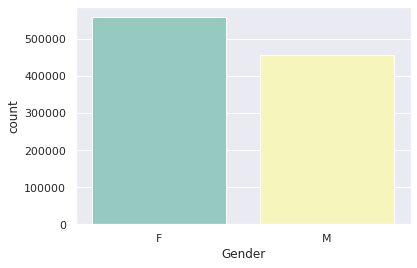

In [74]:
sns.countplot(data = df, x = 'Gender',palette='Set3')

In [75]:
print(round((len(df[df['Gender'] == 'F'])/ (len(df.Gender)))*100,2))
print(round((len(df[df['Gender'] == 'M'])/ (len(df.Gender)))*100,2))

54.98
45.02


In [0]:
# 3. Show the top 5 most preferred names


In [76]:
df.groupby('Name')['Count'].sum().sort_values(ascending = False).head()

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

In [77]:
# 4. What is the median name occurence in the dataset
df.Id.median()

2811921.0

In [78]:
df[df['Id'] == df.median()['Id']]

,Id,Name,Year,Gender,State,Count
508197,2811921,Kasey,2010,F,MO,6


In [79]:
df[df['Id'] == df.median()['Id']]['Name']

508197    Kasey
Name: Name, dtype: object

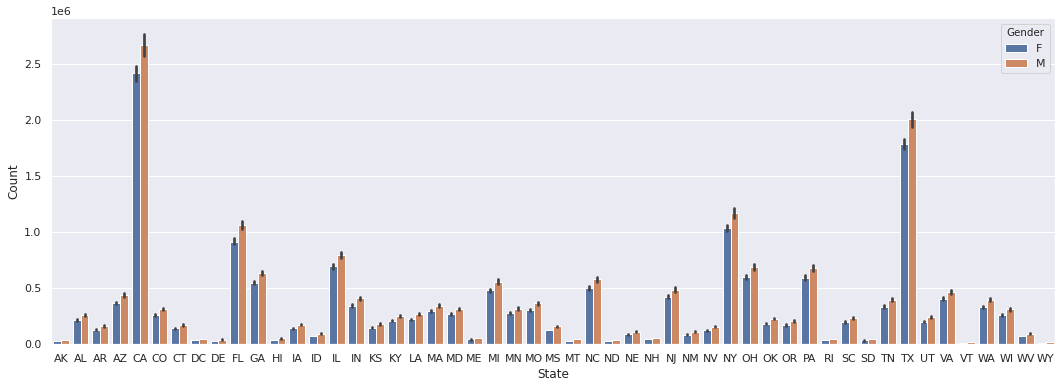

In [80]:
# 5. Distribution of male and female born count by states,
plt.figure(figsize=(18,6))
ax = sns.barplot(data = df,x = 'State',hue = 'Gender',y='Count',estimator=np.sum)

In [81]:
df[df['Gender']=='F'].groupby('State')['Count'].sum()

State
AK      26250
AL     215308
AR     129712
AZ     368567
CA    2414063
CO     260805
CT     141350
DC      35276
DE      31312
FL     915422
GA     549637
HI      37279
IA     144764
ID      72808
IL     695312
IN     344962
KS     147216
KY     210201
LA     221859
MA     294236
MD     269915
ME      43718
MI     480990
MN     276884
MO     307848
MS     127343
MT      31622
NC     501151
ND      30054
NE      88998
NH      45065
NJ     425430
NM      85115
NV     123730
NY    1036009
OH     598027
OK     184967
OR     172111
PA     593382
RI      35560
SC     197917
SD      34104
TN     336487
TX    1786281
UT     202892
VA     405503
VT      15079
WA     334944
WI     264921
WV      73800
WY      14107
Name: Count, dtype: int64

In [82]:
df[df['Gender']=='M'].groupby('State')['Count'].sum()

State
AK      37399
AL     260114
AR     162947
AZ     439691
CA    2670584
CO     313425
CT     171397
DC      47228
DE      41748
FL    1060957
GA     635531
HI      53127
IA     174009
ID      94320
IL     791679
IN     408525
KS     179824
KY     250589
LA     271646
MA     343996
MD     315331
ME      55650
MI     557090
MN     318917
MO     364924
MS     160800
MT      44143
NC     577529
ND      39507
NE     112369
NH      56482
NJ     487900
NM     113542
NV     156037
NY    1172145
OH     688343
OK     228613
OR     209445
PA     682709
RI      47939
SC     237442
SD      45443
TN     398615
TX    2005394
UT     245324
VA     466873
VT      21353
WA     395377
WI     311758
WV      93557
WY      21912
Name: Count, dtype: int64

### Task 2:

In [0]:
# We have the min and max temperatures in a city In India for each months of the year. We
# would like to find a function to describe this and show it graphically, the dataset given below.

# # Task:
# 1. fitting it to the periodic function
# 2. plot the fit
# Data
# Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
# Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Min and max temperature')

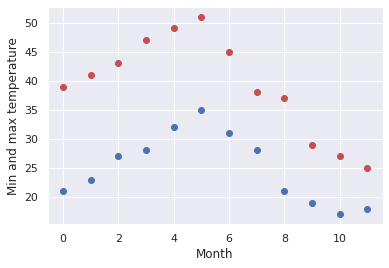

In [115]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [0]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

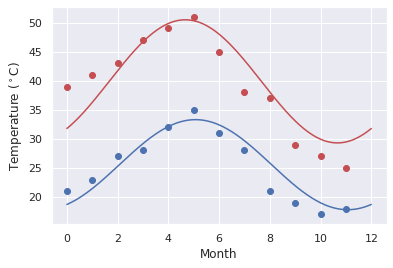

In [117]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()
